In [10]:
import os
import pickle
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
CHANNELS = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FCz', 'FC6', 'T7', 'C3', 'Cz', 'C4',
            'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

Set important directories.

In [3]:
working_directory = 'L:/int_err'
current_path = os.path.abspath(working_directory)
image_directory = os.path.abspath(os.path.join(current_path, 'images'))
pickle_directory = os.path.abspath(os.path.join(current_path, 'pickles'))

In [4]:
consc_std_err_file = os.path.abspath(os.path.join(pickle_directory, 'consc_std_err.pkl'))
with open(consc_std_err_file, 'rb') as pickle_file:
    consc_std_err = pickle.load(pickle_file)
    
consc_std_corr_file = os.path.abspath(os.path.join(pickle_directory, 'consc_std_corr.pkl'))
with open(consc_std_corr_file, 'rb') as pickle_file:
    consc_std_corr = pickle.load(pickle_file)

Saved separability diagram to L:/int_err\consc_std_corr.png


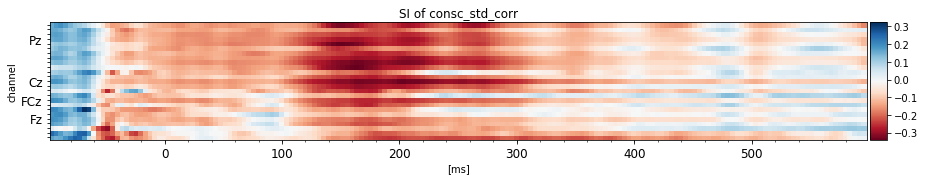

In [5]:
consc_std_corr.save_as_heatmap(working_directory)

In [6]:
consc_std_err.extract_features([[26,50]], CHANNELS, 'Consc_Group')
consc_std_corr.extract_features([[26,50],[52,64],[65,70],[76,85]], CHANNELS, 'Consc_Group')

X, y = consc_std_corr.get_features_and_labels('Consc_Group')

In [8]:
cv = KFold(n_splits=10)

# Grid search with logistic regression
lr = LogisticRegression(C=1.0)

C_range = [0.1, 1, 10, 100, 1000]
penalty_options = ['l1', 'l2']
fit_intercept_options = [True, False]
solver_option = ['liblinear']
class_weight_option = ['auto', '']

param_grid = dict(C=C_range, penalty=penalty_options, fit_intercept=fit_intercept_options, solver=solver_option)

grid_LR = GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_LR.fit(X, y)

# best results
print("The best parameters are %s with a score of %0.2f"\
      %(grid_LR.best_params_, grid_LR.best_score_))

# complete results
for params, mean_score, scores in grid_LR.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))

TypeError: 'KFold' object is not iterable

In [16]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.567 (+/-0.653) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.717 (+/-0.351) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.333 (+/-0.506) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.629 (+/-0.523) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.333 (+/-0.506) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.613 (+/-0.676) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.333 (+/-0.506) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.613 (+/-0.676) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.767 (+/-0.323) for {'C': 1, 'kernel': 'linear'}
0.767 (+/-0.323) for {'C': 10, 'kernel': 'linear'}
0.767 (+/-0.323) for {'C': 100, 'kernel': 'linear'}
0.767 (+/-0.323) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full eva

C:\Users\Mike\AppData\Local\conda\conda\envs\seegnature\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mike\AppData\Local\conda\conda\envs\seegnature\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mike\AppData\Local\conda\conda\envs\seegnature\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mike\AppData\Local\conda\conda\envs\seegnature\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.567 (+/-0.493) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.667 (+/-0.289) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.467 (+/-0.396) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.629 (+/-0.300) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.467 (+/-0.396) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.642 (+/-0.497) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.467 (+/-0.396) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.642 (+/-0.497) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.729 (+/-0.324) for {'C': 1, 'kernel': 'linear'}
0.729 (+/-0.324) for {'C': 10, 'kernel': 'linear'}
0.729 (+/-0.324) for {'C': 100, 'kernel': 'linear'}
0.729 (+/-0.324) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    r